In [1]:
%pylab inline
import cairo
import networkx as nx
import string
#import pyindp.infrastructure as inf
#import pyindp.gametree as gt
import os
pylab.rcParams['figure.figsize'] = (16.0, 16.0)
DATA_DIR="../data/INDP_7-20-2015/"
INTERDEP_DIR="../data/INDP_4-12-2016/"
RESULTS_DIR=r"D:/Dropbox/Dropbox/UCDavis/indp/results/new/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Visualize repaired network.
def visualize_networks():
    pylab.rcParams['figure.figsize'] = (8.0, 8.0)
    layers={"WATER":1,"GAS":2,"POWER":3}
    rev_layers={1:"WATER",2:"GAS",3:"POWER"}

    # Comment this line out on Mac.
    
    img_dir= "../../../Dropbox/UCDavis/inkscape"
    #bluex_img_loc=img_dir+"/bluex_node.png"
    #redx_img_loc =img_dir+"/redx_node.png"
    #bluex_img = Image.open(bluex_img_loc)
    #redx_img  = Image.open(redx_img_loc)

    # Only on the Mac for now.
    loc_files={"GAS"   :"../../../Documents/MURI/Infrastructure/Code/FailureAndRecoveryScenarios2/NodeLocations/GasNodes.csv",
               "WATER" :"../../../Documents/MURI/Infrastructure/Code/FailureAndRecoveryScenarios2/NodeLocations/WaterNodes.csv",
               "POWER" :"../../../Documents/MURI/Infrastructure/Code/FailureAndRecoveryScenarios2/NodeLocations/PowerNodes.csv"}

    # 
    G=inf.load_infrastructure_data(BASE_DIR=DATA_DIR,external_interdependency_dir=INTERDEP_DIR,sim_number=250,magnitude=8)
    # 
    inf.count_interdependencies(G)
    def get_layer(G,layer_num):
        subgraph_nodes=[n[0] for n in G.G.nodes_iter(data=True) if n[1]['data']['inf_data'].net_id == layer_num]
        G_prime=G.G.subgraph(subgraph_nodes)
        return G_prime

    # G_{layer} contains only the graphs of
    # each utility layer. Attributes are pointers
    # to the original infrastructure network --
    # structure is fixed.
    G_power=get_layer(G,layers["POWER"])
    G_water=get_layer(G,layers["WATER"])
    G_gas  =get_layer(G,layers["GAS"])

    net_dict={"POWER":G_power,"WATER":G_water,"GAS":G_gas}
    color_dict={"POWER":'red',"WATER":'blue',"GAS":'green'}
    failure_dict={"POWER":[],"WATER":[],"GAS":[]}
    functional_dict={"POWER":[],"WATER":[],"GAS":[]}
    show_failures=True
    if show_failures:
        for k in layers:
            for u,v,a in net_dict[k].edges_iter(data=True):
                if a['data']['inf_data'].functionality == 0.0:
                    failure_dict[k].append((u,v))
                else:
                    functional_dict[k].append((u,v))
    for n in [1,3]:
        k=rev_layers[n]
        pos={}
        labels={}
        curr_layer=layers[k]
        #print "Printing network",k
        with open(loc_files[k]) as f:
            lines=f.readlines()
            for line in lines[1:]:
                spl=string.split(line,",")
                n_id=int(spl[0])
                n=(n_id,curr_layer)
                if k=="WATER" or k=="POWER":
                    pos[n]=((float(spl[3])/2.0,(float(spl[4])/2.0)))
                else:
                    pos[n]=((float(spl[4])/2.0,(float(spl[5])/2.0)))
                labels[n]=n_id
        nx.draw_networkx_nodes(net_dict[k].to_undirected(),pos,node_color=color_dict[k],node_size=250,alpha=0.7+((layers[k]-1)*0.15))
        if show_failures:
            nx.draw_networkx_edges(net_dict[k].to_undirected(),pos,width=2.0,alpha=0.8,edgelist=failure_dict[k],style='dashed')
            nx.draw_networkx_edges(net_dict[k].to_undirected(),pos,width=2.0,alpha=1.0,edgelist=functional_dict[k])
        else:
            nx.draw_networkx_edges(net_dict[k].to_undirected(),pos,width=2.0,alpha=1.0)
        nx.draw_networkx_labels(net_dict[k],pos,labels,font_color='white')
        plt.axis('off')
        plt.xlim((340000,460000))
        plt.ylim((120000,210000))
        #plt.savefig("figures/"+k+"_net_m8.png",dpi=160)
        plt.show()
        plt.clf()
    

Loading a network..
Loading external interdependencies...
33.3 => 38.1
16.3 => 9.1
19.3 => 14.1
19.3 => 15.1
22.3 => 16.1
22.3 => 18.1
22.3 => 29.1
27.1 => 2.3
44.3 => 45.1
34.3 => 41.1
34.3 => 39.1
34.3 => 40.1
34.3 => 42.1
37.3 => 43.1
20.3 => 28.1
20.3 => 27.1
20.3 => 26.1
23.3 => 3.1
28.1 => 3.3
25.3 => 13.1
25.3 => 31.1
25.3 => 2.1
16.1 => 5.3
36.3 => 25.1
39.3 => 44.1
39.3 => 7.1
39.3 => 6.1
39.3 => 24.1
26.3 => 11.1
29.3 => 36.1
29.3 => 4.1
20.1 => 7.3
27.3 => 35.1
27.3 => 33.1
27.3 => 34.1
32.1 => 6.3
30.3 => 5.1
30.3 => 23.1
37.1 => 9.3
42.3 => 8.1
28.3 => 20.1
10.1 => 4.3
31.3 => 32.1
31.3 => 21.1
31.3 => 37.1
31.3 => 19.1
31.3 => 22.1
36.1 => 8.3
13.1 => 1.3
18.3 => 30.1
18.3 => 12.1
18.3 => 10.1
21.3 => 17.1
21.3 => 1.1
Total Interdependencies = 54
Layer 1 (Water) dependencies on Layer 2 (Gas) =   0
Layer 1 (Water) dependencies on Layer 3 (Power) = 45
Layer 2 (Gas) dependencies on Layer 1 (Water)   = 0
Layer 2 (Gas) dependencies on Layer 3 (Power)   = 0
Layer 3 (Power) depe

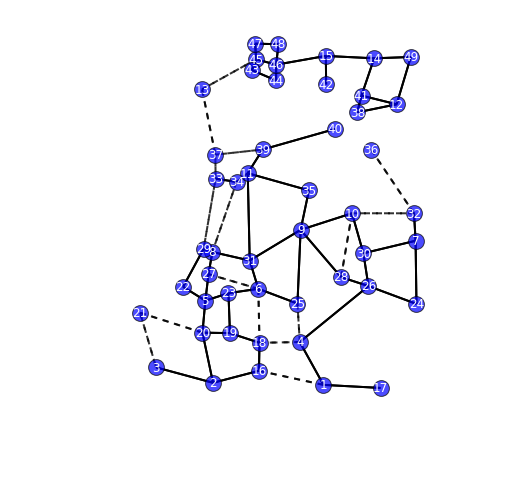

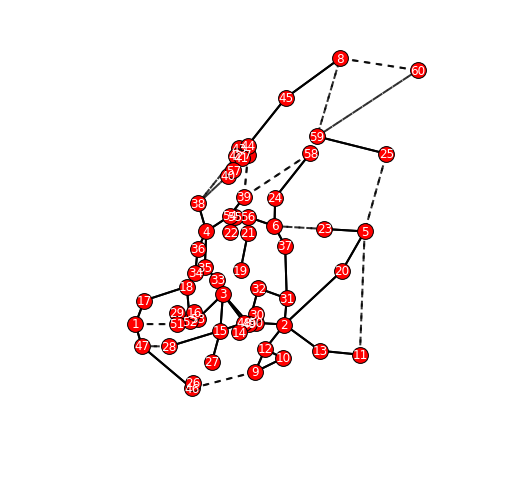

In [3]:
visualize_networks()

In [2]:
def read_results(indp_type,directory,players=[1,3],num_iterations=7,sample_range=range(1,101),flip=False,num_flips=1,scenario=110,expand_results=0):
    import pyindp.indputils as indputils
    indp_results={}
    print "Loading",indp_type,"results...",
    if indp_type == "INDP" or indp_type == "TDINDP":
        if not flip:
            indp_results['results']=indputils.INDPResults.from_results_dir(directory,sample_range)
        else:
            suffix=scenario
            indp_results['results']=indputils.INDPResults.from_results_dir(directory,sample_range,flip=flip,suffix=`suffix`)
        indp_results['integrated_costs']={}
        for t in indp_results['results'].results:
            for cost_key in indp_results['results'].results[t]['costs']:
                if cost_key not in indp_results['integrated_costs']:
                    indp_results['integrated_costs'][cost_key]=0.0
                indp_results['integrated_costs'][cost_key]=indp_results['integrated_costs'][cost_key]+indp_results['results'].results[t]['costs'][cost_key]
    elif indp_type == "INRG" or indp_type == "BACKWARDS_INDUCTION":
        indp_results["sum"]={}
        indp_results["sum"]["integrated_costs"]={}
        for p in players:
            indp_results[p]={}
            indp_results[p]['integrated_costs']={}
            if not flip:
                indp_results[p]['results']=indputils.INDPResults.from_results_dir(directory,sample_range,player=p,suffix="_")
            else:
                suffix=scenario
                indp_results[p]['results']=indputils.INDPResults.from_results_dir(directory,sample_range,player=p,flip=flip,suffix=`suffix`)
            if expand_results > 0:
                max_t = max(indp_results[p]['results'].results.keys())
                max_result= indp_results[p]['results'].results[max_t]
                for t in range(max_t+1,expand_results+1):
                    indp_results[p]['results'].add_cost(t,"Flow",indp_results[p]['results'].results[max_t]['costs']['Flow'])
                    indp_results[p]['results'].add_cost(t,"Total",indp_results[p]['results'].results[max_t]['costs']['Flow'])
            for t in indp_results[p]['results'].results:
                if t not in indp_results["sum"]:
                    indp_results["sum"][t]={}
                    indp_results["sum"]["integrated_costs"]={}
                for cost_key in indp_results[p]['results'].results[t]['costs']:
                    if cost_key not in indp_results[p]['integrated_costs']:
                        indp_results[p]['integrated_costs'][cost_key]=0.0
                    if cost_key not in indp_results["sum"]["integrated_costs"]:
                        indp_results["sum"]["integrated_costs"][cost_key]=0.0
                    if cost_key not in indp_results["sum"][t]:
                        indp_results["sum"][t][cost_key]=0.0
                    indp_results[p]['integrated_costs'][cost_key]=indp_results[p]['integrated_costs'][cost_key]+indp_results[p]['results'].results[t]['costs'][cost_key]
                    indp_results["sum"][t][cost_key]=indp_results["sum"][t][cost_key]+indp_results[p]['results'].results[t]['costs'][cost_key]
                    indp_results["sum"]["integrated_costs"][cost_key]=indp_results["sum"]["integrated_costs"][cost_key]+indp_results[p]['results'].results[t]['costs'][cost_key]
    elif indp_type == "INFOSHARE":
        for p in players:
            indp_results[p]={}
            for i in range(num_iterations):
                indp_results[p][i]={}
                suffix=""
                if not flip:
                    suffix="_"
                    indp_results[p][i]['results']=indputils.INDPResults.from_results_dir(directory,sample_range,player=p,iteration=i,flip=flip,suffix=suffix)
                else:
                    suffix=scenario
                    indp_results[p][i]['results']=indputils.INDPResults.from_results_dir(directory,sample_range,player=p,iteration=i,flip=flip,suffix=`suffix`)
                
                indp_results[p][i]['integrated_costs']={}
                for t in indp_results[p][i]['results'].results:
                    for cost_key in indp_results[p][i]['results'].results[t]['costs']:
                        if cost_key not in indp_results[p][i]['integrated_costs']:
                            indp_results[p][i]['integrated_costs'][cost_key]=0.0
                        indp_results[p][i]['integrated_costs'][cost_key]=indp_results[p][i]['integrated_costs'][cost_key]+indp_results[p][i]['results'].results[t]['costs'][cost_key]
    else:
        print "Error: indp_type must be INDP, TDINDP, INFOSHARE, or INRG."
    print "Done."
    return indp_results


Data processing
===============

In [3]:
# load all data.
mags=[6,7,8,9]
use_pickle=True
indp_results={}
tdindp_results={}
inrg_31_results={}
inrg_13_results={}
inrg_random_results={}
infoshare_results={}
infoshare_forced_results={}
# Standard Shelby County results.
#infoshare_flip1_m8_results= read_results("INFOSHARE",'infoshare_flip_1_results_L2_m8_v1',sample_range=range(1,45),flip=True,scenario=110)
#infoshare_flip1_m9_results= read_results("INFOSHARE",'infoshare_flip_1_results_L2_m9_v1',sample_range=range(1,45),flip=True,scenario=446)
for m in mags:
    if use_pickle:
        import pickle
        print "Magnitude",m
        indp_results[m]=      pickle.load(open("pickle/indp_results_"+`m`+'.pkl','rb'))
        tdindp_results[m]=    pickle.load(open("pickle/tdindp_results_"+`m`+'.pkl','rb'))
        inrg_31_results[m]=   pickle.load(open("pickle/inrg_31_results_"+`m`+'.pkl','rb'))
        inrg_13_results[m]=   pickle.load(open("pickle/inrg_13_results_"+`m`+'.pkl','rb'))
        inrg_random_results[m]=pickle.load(open("pickle/inrg_random_results_"+`m`+'.pkl','rb'))
        infoshare_results[m]=   pickle.load(open("pickle/infoshare_results_"+`m`+'.pkl','rb'))
        infoshare_forced_results[m]=pickle.load(open("pickle/infoshare_results_forced__"+`m`+'.pkl','rb'))
    else:
        print "Magnitude",m
        indp_results[m]=      read_results("INDP",RESULTS_DIR+'indp_results_L2_m'+`m`+'_v2',sample_range=range(1,1001))
        tdindp_results[m]=    read_results("TDINDP",RESULTS_DIR+'tdindp_results_L2_m'+`m`+'_v2',sample_range=range(1,1001))
        inrg_31_results[m]=   read_results("INRG",RESULTS_DIR+'inrg_results_L2_3-1_m'+`m`+'_v1',sample_range=range(1,1001))
        inrg_13_results[m]=   read_results("INRG",RESULTS_DIR+'inrg_results_L2_1-3_m'+`m`+'_v1',sample_range=range(1,1001))
        inrg_random_results[m]=read_results("INRG",RESULTS_DIR+'inrg_results_L2_random_m'+`m`+'_v1',sample_range=range(1,1001))
        infoshare_results[m]=   read_results("INFOSHARE",RESULTS_DIR+'infoshare_results_L2_m'+`m`+'_v1',sample_range=range(1,1001))
    #inrg_randorder_m8_results= read_results("INRG","inrg_randorder_results_L2_m8_v1",sample_range=range(1,100),flip=True,scenario=110)
    #inrg_randorder_m9_results= read_results("INRG","inrg_randorder_results_L2_m9_v1",sample_range=range(1,100),flip=True,scenario=446)
    #infoshare_results[m]= read_results("INFOSHARE",RESULTS_DIR+'infoshare_results_L2_m'+`m`+'_v1',sample_range=range(1,1001))
# Seeded flip results.
#tdindp_seededflip_m8 = read_results("TDINDP", 'tdindp_seededflip_results_L2_m8_v2',sample_range=(0,99),flip=True,scenario=110)
#inrg_seededflip_m8   = read_results("INRG", 'inrg_seededflip_results_L2_m8_v1',sample_range=(0,99),flip=True,scenario=110)
#infoshare_seededflip_m8=read_results("INFOSHARE",'infoshare_seededflip_results_L2_m8_v1',sample_range=(0,99),flip=True,scenario=110)
#inrg_rand_seededflip_m8=read_results("INRG",'inrg_randorder_seededflip_results_L2_m8_v1',sample_range=(0,99),flip=True,scenario=110)

Magnitude 6
Magnitude 7
Magnitude 8
Magnitude 9


In [14]:
import pickle
infoshare_forced_results={}
mags=[6,7,8,9]
for m in mags:
    infoshare_forced_results[m]=read_results("INFOSHARE",RESULTS_DIR+'infoshare_results_L2_forced__m'+`m`+'_v1',sample_range=range(1,1001),num_iterations=6)
    pickle.dump(infoshare_forced_results[m],open("pickle/infoshare_results_forced__"+`m`+'.pkl','wb'))

Loading INFOSHARE results... Done.
Loading INFOSHARE results... Done.
Loading INFOSHARE results... Done.
Loading INFOSHARE results... Done.


In [4]:
import pickle
bi_31_results={}
bi_13_results={}
bi_random_results={}
inrg_31_results_100={}
inrg_13_results_100={}
inrg_random_results_100={}
mags=[6,7,8,9]
for m in mags:
    bi_31_results[m]=read_results("BACKWARDS_INDUCTION",RESULTS_DIR+'bi_results_L2_3-1_m'+`m`+"_v1",sample_range=range(1,101),expand_results=50)
    bi_13_results[m]=read_results("BACKWARDS_INDUCTION",RESULTS_DIR+'bi_results_L2_1-3_m'+`m`+"_v1",sample_range=range(1,101),expand_results=50)
    bi_random_results[m]=read_results("BACKWARDS_INDUCTION",RESULTS_DIR+'bi_results_L2_random_m'+`m`+"_v1",sample_range=range(1,101),expand_results=50)
    inrg_31_results_100[m]=   read_results("INRG",RESULTS_DIR+'inrg_results_L2_3-1_m'+`m`+'_v1',sample_range=range(1,101))
    inrg_13_results_100[m]=   read_results("INRG",RESULTS_DIR+'inrg_results_L2_1-3_m'+`m`+'_v1',sample_range=range(1,101))
    inrg_random_results_100[m]=read_results("INRG",RESULTS_DIR+'inrg_results_L2_random_m'+`m`+'_v1',sample_range=range(1,101))
    last_cost={"1-3":None,"3-1":None}
    last_t={"1-3":None,"3-1":None}
    #for p in [1,3]:
    #    last_cost["1-3"]=None
    #    last_cost["3-1"]=None
    #    last_t["1-3"]=0
    #    last_t["3-1"]=0
    #    for t in bi_31_results[m][p]['results'].results:
    #        last_cost["3-1"]=bi_31_results[m][p]['results'].results[t]
    #        last_t["3-1"]=t
    #    for t in bi_13_results[m][p]['results'].results:
    #        last_cost["1-3"]=bi_13_results[m][p]['results'].results[t]
    #        last_t["1-3"]=t
    #    for x in range(last_t["3-1"]+1,50):
    #        bi_31_results[m][p]['results'].results[x]=last_cost["3-1"]
    #    for x in range(last_t["1-3"]+1,50):
    #        bi_13_results[m][p]['results'].results[x]=last_cost["1-3"]
    #pickle.dump(bi_31_results[m],open("pickle/bi_results_3-1_"+`m`+".pkl",'wb'))
    #pickle.dump(bi_13_results[m],open("pickle/bi_results_1-3_"+`m`+".pkl",'wb'))
    #pickle.dump(inrg_31_results_100[m],open("pickle/inrg_results_L2_3-1_"+`m`+"s100.pkl",'wb'))
    #pickle.dump(inrg_13_results_100[m],open("pickle/inrg_results_L2_1-3_"+`m`+"s100.pkl",'wb'))

Loading BACKWARDS_INDUCTION results... Done.
Loading BACKWARDS_INDUCTION results... Done.
Loading BACKWARDS_INDUCTION results... Done.
Loading INRG results... Done.
Loading INRG results... Done.
Loading INRG results... Done.
Loading BACKWARDS_INDUCTION results... Done.
Loading BACKWARDS_INDUCTION results... Done.
Loading BACKWARDS_INDUCTION results... Done.
Loading INRG results... Done.
Loading INRG results... Done.
Loading INRG results... Done.
Loading BACKWARDS_INDUCTION results... Done.
Loading BACKWARDS_INDUCTION results... Done.
Loading BACKWARDS_INDUCTION results... Done.
Loading INRG results... Done.
Loading INRG results... Done.
Loading INRG results... Done.
Loading BACKWARDS_INDUCTION results... Done.
Loading BACKWARDS_INDUCTION results... Done.
Loading BACKWARDS_INDUCTION results... Done.
Loading INRG results... Done.
Loading INRG results... Done.
Loading INRG results... Done.


In [17]:
import pickle
for m in mags:
    pickle.dump(indp_results[m],open("pickle/indp_results_"+`m`+'.pkl','wb'))
    pickle.dump(tdindp_results[m],open("pickle/tdindp_results_"+`m`+'.pkl','wb'))
    pickle.dump(inrg_31_results[m],open("pickle/inrg_31_results_"+`m`+'.pkl','wb'))
    pickle.dump(inrg_13_results[m],open("pickle/inrg_13_results_"+`m`+'.pkl','wb'))
    pickle.dump(inrg_random_results[m],open("pickle/inrg_random_results_"+`m`+'.pkl','wb'))
    pickle.dump(infoshare_results[m],open("pickle/infoshare_results_"+`m`+'.pkl','wb'))
    #pickle.dump(bi_results[m],open("pickle/bi_results_"+`m`+".pkl",'wb'))

Plots
=====

Total cost comparison plots
---------------------------
* INDP (All magnitudes)

In [5]:
# Global graph properties.
import numpy as np
figsize=(6,5)
dpi=80

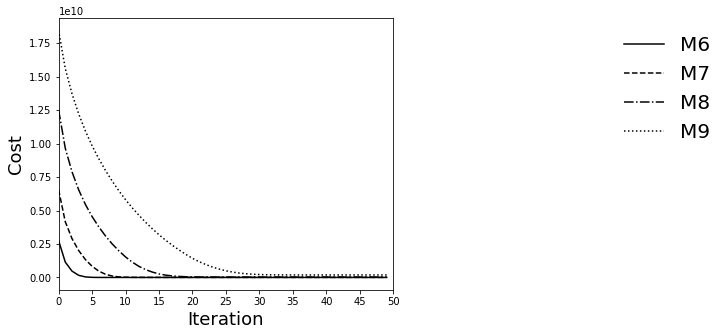

In [6]:
xs=[x for x in range(0,50)]
plt.figure(figsize=figsize, dpi=dpi)
plt.plot(xs, [indp_results[6]['results'].results[y]['costs']['Total'] for y in xs], color="black", linestyle="-", label="M6")
plt.plot(xs, [indp_results[7]['results'].results[y]['costs']['Total'] for y in xs], color="black", linestyle="--", label="M7")
plt.plot(xs, [indp_results[8]['results'].results[y]['costs']['Total'] for y in xs], color="black", linestyle="-.", label="M8")
plt.plot(xs, [indp_results[9]['results'].results[y]['costs']['Total'] for y in xs], color="black", linestyle=":", label="M9")

plt.xticks([0,5,10,15,20,25,30,35,40,45,50],fontsize=10)
plt.xlim(0,50)
plt.xlabel("Iteration",fontsize=18)
plt.ylabel("Cost",fontsize=18)
plt.legend(bbox_to_anchor=(2.0, 1), frameon=False, fontsize=20)
plt.show()


* Cost comparison of INRG orderings using "fairness difference". This is the difference between the randomly ordered simulation and a leader/follower simulation. Negative fairness implies that the player is worse off than a random ordering.

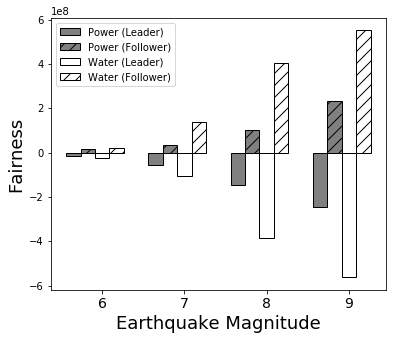

In [10]:
xs=[x for x in range(1,30)]
N=4
width=0.175
ind = np.arange(N)
fig, ax = plt.subplots(figsize=figsize)
#print sum([inrg_random_results[m][3]['results'].results[y]['costs']['Total']])
#print sum([inrg_31_results[m][3]['results'].results[y]['costs']['Total']])
#print sum([inrg_random_results[m][1]['results'].results[y]['costs']['Total']])
#print sum([inrg_13_results[m][1]['results'].results[y]['costs']['Total']])
pow_31diff=[sum([inrg_random_results[m][3]['results'].results[y]['costs']['Total']-inrg_31_results[m][3]['results'].results[y]['costs']['Total'] for y in xs]) for m in [6,7,8,9]]
pow_13diff=[sum([inrg_random_results[m][3]['results'].results[y]['costs']['Total']-inrg_13_results[m][3]['results'].results[y]['costs']['Total'] for y in xs]) for m in [6,7,8,9]]
wat_31diff=[sum([inrg_random_results[m][1]['results'].results[y]['costs']['Total']-inrg_31_results[m][1]['results'].results[y]['costs']['Total'] for y in xs]) for m in [6,7,8,9]]
wat_13diff=[sum([inrg_random_results[m][1]['results'].results[y]['costs']['Total']-inrg_13_results[m][1]['results'].results[y]['costs']['Total'] for y in xs]) for m in [6,7,8,9]]

pow_31bar = ax.bar(ind, pow_31diff, width, color='gray', edgecolor='black', label="Power (Leader)")
pow_13bar = ax.bar(ind+width, pow_13diff, width, color='gray', edgecolor='black', hatch="//", label="Power (Follower)")
wat_13bar = ax.bar(ind+width*2, wat_13diff, width, color='white', edgecolor='black', label="Water (Leader)")
wat_31bar = ax.bar(ind+width*3, wat_31diff, width, color='white', edgecolor='black', hatch="//", label="Water (Follower)")

#plt.xlim(0,50)
ax.set_xticks(ind + width*2)
ax.set_xticklabels(('6','7','8','9'),fontsize=14)
plt.xlabel("Earthquake Magnitude",fontsize=18)
plt.ylabel("Fairness",fontsize=18)
#plt.legend(bbox_to_anchor=(1.6, 1), frameon=False, fontsize=14)
plt.legend(loc="upper left")
plt.savefig("figures/INRG_fairness.pdf",format='pdf',dpi=160,bbox_inches='tight')
plt.show()


* InfoShare convergence results

In [11]:
import pyindp.indputils as indputils
num_iterations=6
num_samples=1000
magnitudes=[6,7,8,9]
max_convergence_iters=[]
max_convergence_samps=[]
for m in magnitudes:
    max_convergence_iter=0
    max_convergence_samp=[]
    for s in range(1,num_samples+1):
        convergence_iter=0
        for i in range(num_iterations-1):
            iter_result_0=indputils.INDPResults.from_csv(RESULTS_DIR+"infoshare_results_L2_forced__m"+`m`+"_v1",sample_num=s,suffix="P1_i"+`i`+"_")
            actions_0=[iter_result_0.results[t]['actions'] for t in iter_result_0.results]
            iter_result_1=indputils.INDPResults.from_csv(RESULTS_DIR+"infoshare_results_L2_forced__m"+`m`+"_v1",sample_num=s,suffix="P1_i"+`i+1`+"_")
            actions_1=[iter_result_1.results[t]['actions'] for t in iter_result_1.results]
            if actions_1 != actions_0:
                convergence_iter+=1
        if convergence_iter >= max_convergence_iter:
            if convergence_iter > max_convergence_iter:
                max_convergence_samp=[s]
                max_convergence_iter=convergence_iter
            else:
                max_convergence_samp.append(s)
    max_convergence_iters.append(max_convergence_iter)
    max_convergence_samps.append(max_convergence_samp)
print "Magnitudes=",magnitudes
print "Max. Convergence Iterations=",max_convergence_iters
print "Max. Convergence Samples   =",max_convergence_samps
for j in max_convergence_samps:
    print len(j)

KeyboardInterrupt: 

In [12]:
infoshare_P1_costs=[]
infoshare_P3_costs=[]
mag_index=7
for m in max_convergence_samps[1:]:
    P1_iter_costs=[0.0]*6
    P3_iter_costs=[0.0]*6
    for s in m:
        for i in range(0,6):
            result_P1=indputils.INDPResults.from_csv(RESULTS_DIR+"infoshare_results_L2_forced__m"+`mag_index`+"_v1",sample_num=s,suffix="P1_i"+`i`+"_")
            result_P3=indputils.INDPResults.from_csv(RESULTS_DIR+"infoshare_results_L2_forced__m"+`mag_index`+"_v1",sample_num=s,suffix="P3_i"+`i`+"_")
            P1_iter_costs[i]=P1_iter_costs[i]+sum([result_P1.results[t]['costs']['Total'] for t in result_P1.results])
            P3_iter_costs[i]=P3_iter_costs[i]+sum([result_P3.results[t]['costs']['Total'] for t in result_P3.results])
    P1_iter_costs=[x/len(m) for x in P1_iter_costs]
    P3_iter_costs=[x/len(m) for x in P3_iter_costs]
    infoshare_P1_costs.append(P1_iter_costs)
    infoshare_P3_costs.append(P3_iter_costs)
    mag_index+=1
    


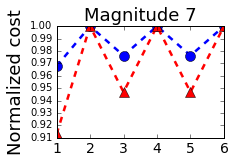

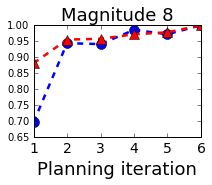

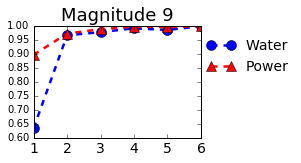

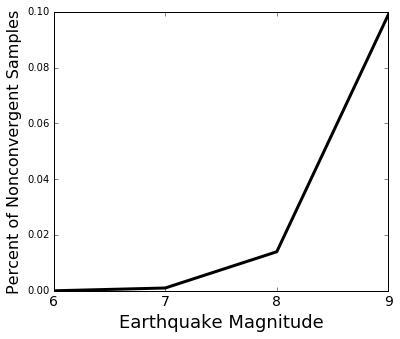

In [120]:
for m in range(len(infoshare_P1_costs)):
    fig=plt.figure(figsize=(3,2), dpi=80)
    max_P1=max(infoshare_P1_costs[m])
    max_P3=max(infoshare_P3_costs[m])
    ys_1=[x/max_P1 for x in infoshare_P1_costs[m]]
    ys_3=[x/max_P3 for x in infoshare_P3_costs[m]]
    plt.plot([x for x in range(1,7)],ys_1,linewidth=2.5,label="Water",color='blue',marker='o',linestyle='--',markersize=10)
    plt.plot([x for x in range(1,7)],ys_3,linewidth=2.5,label="Power",color='red',marker='^',linestyle='--',markersize=10)
    plt.xticks([1,2,3,4,5,6],fontsize=14)
    mag=6
    if m == 0:
        plt.title("Magnitude 7",fontsize=18)
        plt.ylabel("Normalized cost",fontsize=18)
        mag=7
    if m == 1:
        plt.title("Magnitude 8",fontsize=18)
        plt.xlabel("Planning iteration",fontsize=18)
        mag=8
    if m == 2:
        plt.title("Magnitude 9",fontsize=18)
        plt.legend(bbox_to_anchor=(1.6, 1.0), frameon=False, fontsize=14)
        mag=9
    plt.savefig("figures/infoshare_convergence_cost_m"+`mag`+".pdf",format="pdf",dpi=80,bbox_inches='tight')
fig=plt.figure(figsize=figsize, dpi=80)
ys=[len(m) for m in max_convergence_samps]
ys=[y/1000.0 for y in ys]
ys[0]=0.0
xs=[6,7,8,9]
plt.xticks([6,7,8,9],fontsize=14)
plt.xlabel("Earthquake Magnitude",fontsize=18)
plt.ylabel("Percent of Nonconvergent Samples",fontsize=16)
plt.plot(xs,ys,linewidth=3.0,color='black')
plt.savefig("figures/infoshare_convergence_count.pdf",format="pdf",dpi=80)

In [13]:
def infoshare_num_iterations(sample,magnitude,num_iterations=6):
    import pyindp.indputils as indputils
    players=[1,3]
    max_iters=0
    for p in players:
        iter_results=[]
        num_iters=1
        prev_iter=None
        for i in range(num_iterations):
            results=indputils.INDPResults.from_csv(RESULTS_DIR+"infoshare_results_L2_forced__m"+`magnitude`+"_v1",sample_num=sample,suffix="P"+`p`+"_i"+`i`+"_")
            max_t=max(results.results.keys())
            ts=[x for x in range(1,max_t+1)]
            curr_iter=[]
            #print "Prev iter.=",prev_iter
            for t in ts:
                curr_iter.append(results.results[t]['actions'])
            #print "Curr iter.=",curr_iter
            if prev_iter:
                if prev_iter != curr_iter:
                    num_iters=i+1
            prev_iter=[x for x in curr_iter]
        if num_iters > max_iters:
            max_iters = num_iters
    return max_iters        
avg_infoshare_iters=[]
for m in [6,7,8,9]:
    m_iters=[]
    for s in range(1,101):
        m_iters.append(infoshare_num_iterations(s,m))
    avg_infoshare_iters.append(sum(m_iters)/len(m_iters))
print avg_infoshare_iters

[1, 1, 2, 3]


In [66]:
# Investigation of M8, sample 11.
import pyindp.indputils as indputils
players=[1,3]
num_iterations=6
num_timesteps=30
#sample=302
#sample=9
sample=610
all_iter_results={}
for p in players:
    iter_results={}
    for i in range(num_iterations):
        results=indputils.INDPResults.from_csv(RESULTS_DIR+"infoshare_results_L2_forced__m7_v1",sample_num=sample,suffix="P"+`p`+"_i"+`i`+"_")
        max_t=max(results.results.keys())
        ts=[x for x in range(1,max_t+1)]
        iter_results[i]={}
        for t in ts:
            iter_results[i][t]=results.results[t]['actions']
    all_iter_results[p]=iter_results
   # for t in range(1,51):
   #     print t,"=>",iter_results[0][t]
    print "=============="
    print "Player",p
    print "=============="
    time_to_recovery=50
    #for t in range(len(iter_results[i])):
    #    if iter_results[num_iterations-1][t]:
    #        time_to_recovery+=1
    print "Time to recovery=",time_to_recovery
    print "      ",
    with open("infoshare_convergence_m8_s"+`sample`+"_p"+`p`+".csv",'w') as f:
        for i in range(num_iterations):
            print `i`+"               ",
        f.write(",".join([`i` for i in range(num_iterations)])+"\n")
        print ""
        for t in range(1,time_to_recovery+1):
            print "t=",t,":",
            f.write(`t`)
            for i in range(num_iterations):
                if iter_results[i][t]:
                    f.write(","+iter_results[i][t][0])
                    print `[iter_results[i][t][0]]`+"  \t",
                else:
                    print "               \t",
            f.write("\n")
            print ""
    

Player 1
Time to recovery= 50
       0                1                2                3                4                5                
t= 1 : ['6.1']  	['6.1']  	['6.1']  	['6.1']  	['6.1']  	['6.1']  	
t= 2 : ['20.1']  	['20.1']  	['20.1']  	['20.1']  	['20.1']  	['20.1']  	
t= 3 : ['2.1']  	['2.1']  	['2.1']  	['2.1']  	['2.1']  	['2.1']  	
t= 4 : ['34.1']  	['34.1']  	['34.1']  	['34.1']  	['34.1']  	['34.1']  	
t= 5 : ['39.1']  	['22.1']  	['22.1']  	['22.1']  	['22.1']  	['22.1']  	
t= 6 : ['3.1/2.1']  	['3.1/2.1']  	['3.1/2.1']  	['3.1/2.1']  	['3.1/2.1']  	['3.1/2.1']  	
t= 7 : ['22.1']  	['36.1']  	['39.1']  	['36.1']  	['39.1']  	['36.1']  	
t= 8 : ['36.1']  	['39.1']  	['36.1']  	['39.1']  	['36.1']  	['39.1']  	
t= 9 : ['37.1']  	['37.1']  	['37.1']  	['37.1']  	['37.1']  	['37.1']  	
t= 10 : ['13.1']  	['13.1']  	['13.1']  	['13.1']  	['13.1']  	['13.1']  	
t= 11 : ['45.1/13.1']  	['45.1/13.1']  	['45.1/13.1']  	['45.1/13.1']  	['45.1/13.1']  	['45.1/13.1']  	
t= 12 : 

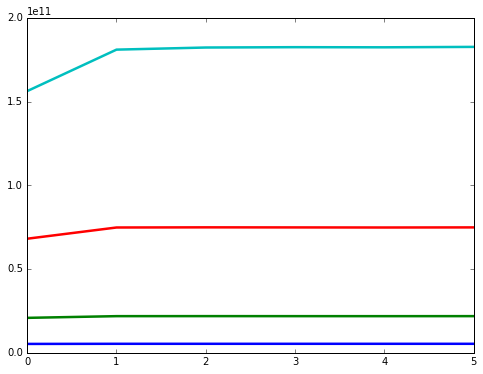

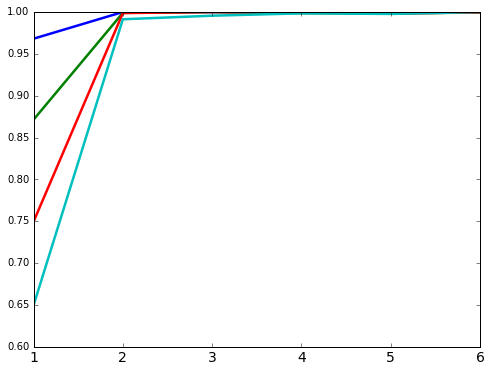

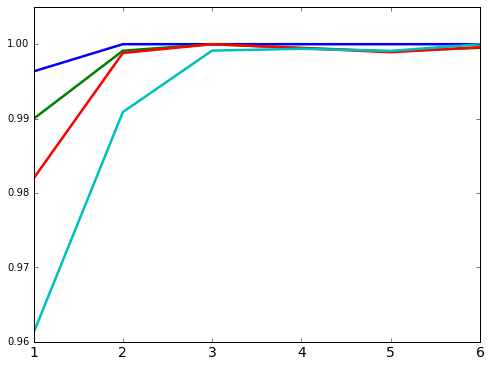

In [82]:
fig=plt.figure(figsize=(8,6),dpi=80)
for m in mags:
    xs=[x for x in range(0,6)]
    ys=[infoshare_forced_results[m][1][y]['integrated_costs']['Total']+infoshare_forced_results[m][3][y]['integrated_costs']['Total'] for y in xs]
    plt.plot(xs,ys,linewidth=2.5,label="Mag."+`m`)
plt.show()

for p in [1,3]:
    fig=plt.figure(figsize=(8,6),dpi=80)
    for m in mags:
        xs=[x for x in range(1,7)]
        ys=[infoshare_forced_results[m][p][y-1]['integrated_costs']['Total'] for y in xs]
        max_ys=max(ys)
        ys=[y/max_ys for y in ys]
        plt.xticks([1,2,3,4,5,6],fontsize=14)
        plt.plot(xs,ys,linewidth=2.5,label="P"+`p`)

In [ ]:
import pyindp.indp as indp
sim_number=453
N=inf.load_infrastructure_data(external_interdependency_dir=INTERDEP_DIR,magnitude=8,v=2,sim_number=sim_number)
nodes={1:[13,8],3:[1,42]}
ps=[1,3]
for p in ps:
    N_prime=N.copy()
    # Fully restore all other networks.
    for n,d in N_prime.G.nodes_iter(data=True):
        if n[1] in [x for x in ps if x != p]:
            d['data']['inf_data'].functionality=1.0
            d['data']['inf_data'].repaired=1.0
    for u,v,a in N_prime.G.edges_iter(data=True):
        if not a['data']['inf_data'].is_interdep and u[1] in [x for x in ps if x != p]:
            a['data']['inf_data'].functionality=1.0
            a['data']['inf_data'].repaired=1.0
    curr_actions=all_iter_results[p][2]
    for t in range(0,10):
        for a in curr_actions[t]:
            if "/" in a:
                # split arc
                data=string.split(a,"/")
                u=(int(string.split(data[0],".")[0]),int(string.split(data[0],".")[1]))
                v=(int(string.split(data[1],".")[0]),int(string.split(data[1],".")[1]))
                N_prime.G[u][v]['data']['inf_data'].functionality=1.0
                N_prime.G[u][v]['data']['inf_data'].repaired=1.0
            else:
                # split node.
                n=(int(string.split(a,".")[0]),int(string.split(a,".")[1]))
                N_prime.G.node[n]['data']['inf_data'].functionality=1.0
                N_prime.G.node[n]['data']['inf_data'].repaired=1.0
    base_cost=indp.indp(N_prime,0,controlled_layers=[p])[1].results[0]["costs"]["Total"]
    for n in nodes[p]:
        N_prime.G.node[(n,p)]['data']['inf_data'].functionality=1.0
        N_prime.G.node[(n,p)]['data']['inf_data'].repaired=1.0
        n_cost=indp.indp(N_prime,0,controlled_layers=[p])[1].results[0]["costs"]["Total"]
        n_value=base_cost-n_cost
        N_prime.G.node[(n,p)]['data']['inf_data'].functionality=0.0
        N_prime.G.node[(n,p)]['data']['inf_data'].repaired=0.0
        print "Value of",n,"for player",p,"=",n_value
    

In [ ]:
N=inf.load_infrastructure_data(external_interdependency_dir=INTERDEP_DIR,magnitude=8,v=2,sim_number=-1)
p1n6=N.G.node[(6,1)]
p1n20=N.G.node[(20,1)]
p1n36=N.G.node[(36,1)]
interdep_p1n13=[(u,v) for u,v,a in N.G.edges_iter(data=True) if a['data']['inf_data'].is_interdep and (u == (13,1) or v == (13,1))]
interdep_p1n8=[(u,v) for u,v,a in N.G.edges_iter(data=True) if a['data']['inf_data'].is_interdep and (u == (8,1) or v == (8,1))]
interdep_p1n34=[(u,v) for u,v,a in N.G.edges_iter(data=True) if a['data']['inf_data'].is_interdep and (u == (34,1) or v == (34,1))]
interdep_p1n38=[(u,v) for u,v,a in N.G.edges_iter(data=True) if a['data']['inf_data'].is_interdep and (u == (38,1) or v == (38,1))]
interdep)p1n21
print "13,1 =",interdep_p1n13
print "8,1=",interdep_p1n8
print "34,1=",interdep_p1n34
print "38,1=",interdep_p1n38

interdep_p3n1 =[(u,v) for u,v,a in N.G.edges_iter(data=True) if a['data']['inf_data'].is_interdep and (u == (1,3) or v == (1,3))]
interdep_p3n35=[(u,v) for u,v,a in N.G.edges_iter(data=True) if a['data']['inf_data'].is_interdep and (u == (35,3) or v == (35,3))]
interdep_p3n42=[(u,v) for u,v,a in N.G.edges_iter(data=True) if a['data']['inf_data'].is_interdep and (u == (42,3) or v == (42,3))]
interdep_p3n51=[(u,v) for u,v,a in N.G.edges_iter(data=True) if a['data']['inf_data'].is_interdep and (u == (51,3) or v == (51,3))]
interdep_p3n29=[(u,v) for u,v,a in N.G.edges_iter(data=True) if a['data']['inf_data'].is_interdep and (u == (29,3) or v == (29,3))]
print ""
print "1,3 =",interdep_p3n1
print "35,3=",interdep_p3n35
print "42,3=",interdep_p3n42
print "51,3=",interdep_p3n51
print "29,3=",interdep_p3n29


* Cost comparison of algorithms (Magnitude 8)

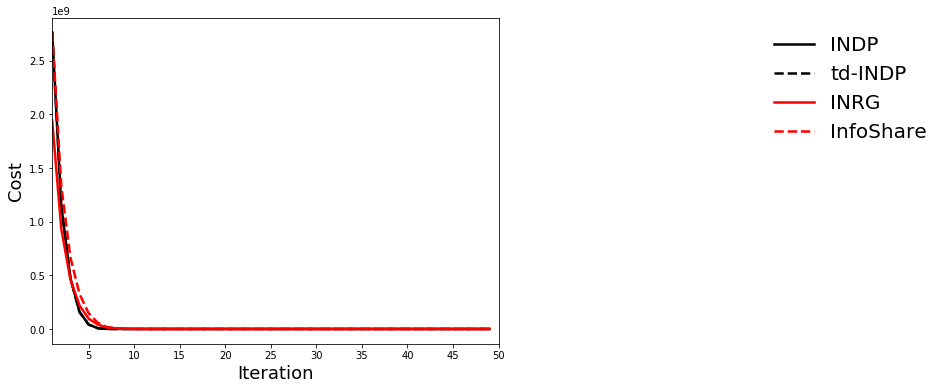

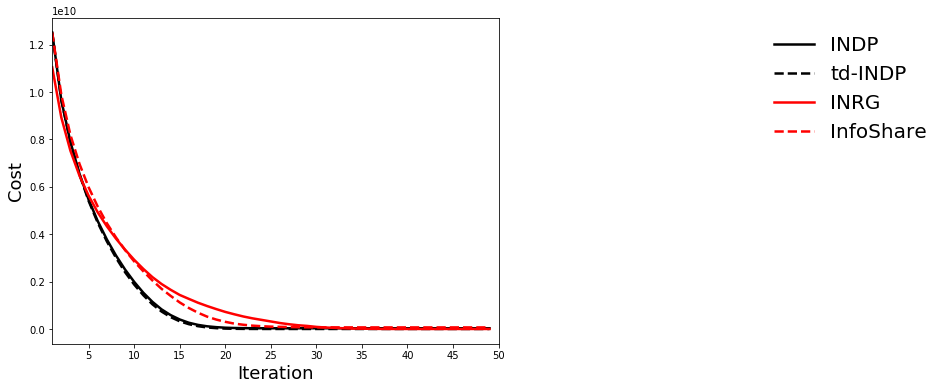

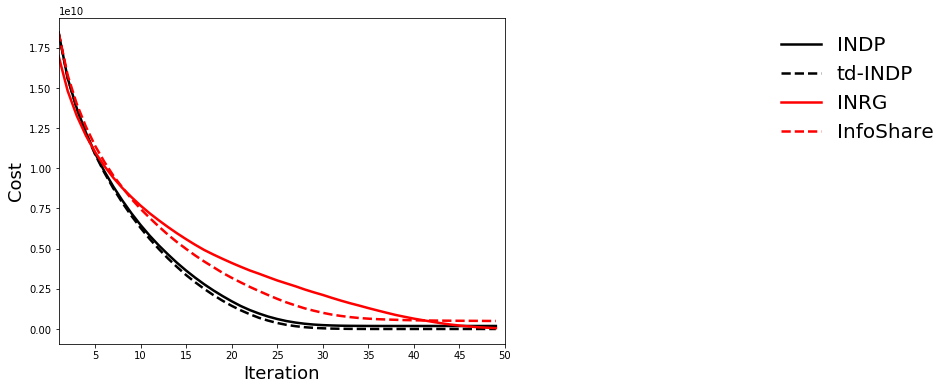

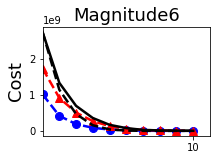

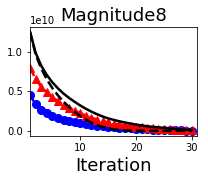

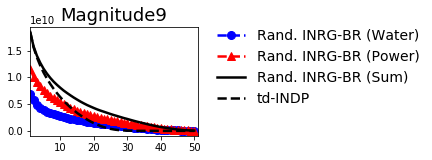

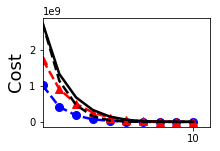

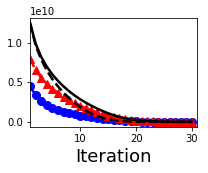

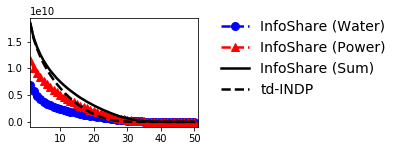

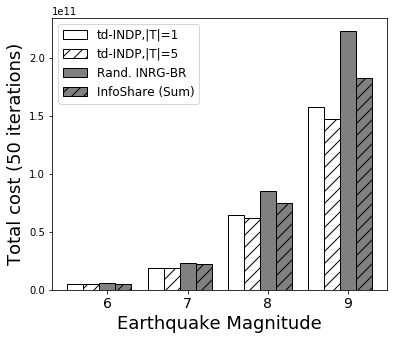

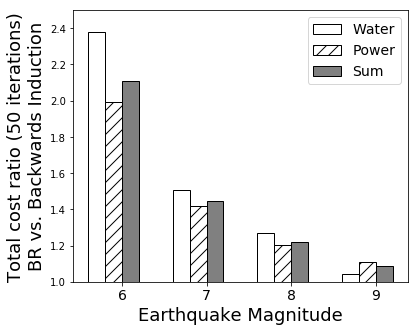

In [31]:
# Per magnitude comparisons
xs=[x for x in range(1,50)]
for m in [6,8,9]:
    plt.figure(figsize=(8,6), dpi=80)
    infoshare_sums=[infoshare_results[m][1][6]['results'].results[y]['costs']['Total']+infoshare_results[m][3][6]['results'].results[y]['costs']['Total'] for y in xs]
    inrg_sums=     [inrg_random_results[m][1]['results'].results[y-1]['costs']['Total']+inrg_random_results[m][3]['results'].results[y]['costs']['Total'] for y in xs]
    plt.plot(xs, [indp_results[m]['results'].results[y-1]['costs']['Total'] for y in xs], color="black", linewidth=2.5, linestyle="-",label="INDP")
    plt.plot(xs, [tdindp_results[m]['results'].results[y]['costs']['Total'] for y in xs], color="black", linewidth=2.5, linestyle="--",label="td-INDP")
    plt.plot(xs, inrg_sums, color="red",linewidth=2.5,linestyle="-",label="INRG")
    plt.plot(xs, infoshare_sums,color="red",linewidth=2.5,linestyle="--",label="InfoShare")
    plt.xticks([0,5,10,15,20,25,30,35,40,45,50],fontsize=10)
    plt.xlim(1,50)
    plt.xlabel("Iteration",fontsize=18)
    plt.ylabel("Cost",fontsize=18)
    plt.legend(bbox_to_anchor=(2.0, 1), frameon=False, fontsize=20)
    plt.savefig("figures/INDP_M"+`m`+"_total_comparison.png",dpi=160,bbox_inches='tight')
    plt.show()


# Decentralized algorithm comparison.
# INRG.
xs_dict={6: [x for x in range(1,11)], 8: [x for x in range(1,31)], 9: [x for x in range(1,51)]}
for m in [6,8,9]:
    mxs=xs_dict[m]
    plt.figure(figsize=(3,2),dpi=80)
    inrg_sums=     [inrg_random_results[m][1]['results'].results[y-1]['costs']['Total']+inrg_random_results[m][3]['results'].results[y-1]['costs']['Total'] for y in mxs]
    plt.plot(mxs, [inrg_random_results[m][1]['results'].results[y-1]['costs']['Total'] for y in mxs], color="blue",marker="o",markersize=8, linewidth=2.5, linestyle="--", label="Rand. INRG-BR (Water)")
    plt.plot(mxs, [inrg_random_results[m][3]['results'].results[y-1]['costs']['Total'] for y in mxs], color="red", marker="^",markersize=8,linewidth=2.5, linestyle="--", label="Rand. INRG-BR (Power)")
    
    plt.plot(mxs, inrg_sums[:len(mxs)], color="black",linewidth=2.5,linestyle="-",label="Rand. INRG-BR (Sum)")
    plt.plot(mxs, [tdindp_results[m]['results'].results[y]['costs']['Total'] for y in mxs], color="black", linewidth=2.5, linestyle="--",label="td-INDP")
    plt.xticks([0,10,20,30,40,50],fontsize=10)
    if m == 8:
        plt.xlabel("Iteration",fontsize=18)
    if m == 6:
        plt.ylabel("Cost",fontsize=18)
    plt.xlim(1,max(mxs)+1)
    if m == 9:
        plt.legend(bbox_to_anchor=(2.4, 1.1), frameon=False, fontsize=14)
    plt.title("Magnitude"+`m`,fontsize=18)
    plt.savefig("figures/INRG_itercomparison_m"+`m`+".pdf",format="pdf",dpi=80,bbox_inches='tight')
    plt.show()
# InfoShare.
xs_dict={6: [x for x in range(1,11)], 8: [x for x in range(1,31)], 9: [x for x in range(1,51)]}
for m in [6,8,9]:
    mxs=xs_dict[m]
    plt.figure(figsize=(3,2),dpi=80)
    infoshare_sums=[infoshare_forced_results[m][1][5]['results'].results[y]['costs']['Total']+infoshare_forced_results[m][3][5]['results'].results[y]['costs']['Total'] for y in mxs]   
    plt.plot(mxs, [infoshare_forced_results[m][1][5]['results'].results[y]['costs']['Total'] for y in mxs], color="blue",marker="o",markersize=8, linewidth=2.5, linestyle="--", label="InfoShare (Water)")
    plt.plot(mxs, [infoshare_forced_results[m][3][5]['results'].results[y]['costs']['Total'] for y in mxs], color="red",marker="^",markersize=8, linewidth=2.5, linestyle="--", label="InfoShare (Power)")
    plt.plot(mxs, infoshare_sums[:len(mxs)], color="black",linewidth=2.5,linestyle="-",label="InfoShare (Sum)")
    plt.plot(mxs, [tdindp_results[m]['results'].results[y]['costs']['Total'] for y in mxs], color="black", linewidth=2.5, linestyle="--",label="td-INDP")
    plt.xticks([0,10,20,30,40,50],fontsize=10)
    if m == 8:
        plt.xlabel("Iteration",fontsize=18)
    if m == 6:
        plt.ylabel("Cost",fontsize=18)
    plt.xlim(1,max(mxs)+1)
    if m == 9:
        plt.legend(bbox_to_anchor=(2.2, 1.1), frameon=False, fontsize=14)
    plt.savefig("figures/InfoShare_itercomparison_m"+`m`+".pdf",format="pdf",dpi=80,bbox_inches='tight')
    plt.show()

# Integrated total cost comparison (bar chart).
infoshare_sums=[infoshare_forced_results[m][1][5]['integrated_costs']['Total']+infoshare_forced_results[m][3][5]['integrated_costs']['Total'] for m in [6,7,8,9]]
inrg_sums     =[inrg_random_results[m][1]['integrated_costs']['Total']+inrg_random_results[m][3]['integrated_costs']['Total'] for m in [6,7,8,9]]
ind=np.arange(4)
width=0.2
fig, ax = plt.subplots(figsize=figsize, dpi=80)
plt.bar(ind,[indp_results[m]['integrated_costs']['Total'] for m in [6,7,8,9]],width,color='white',edgecolor='black',label="td-INDP,|T|=1")
plt.bar(ind+(1*width),[tdindp_results[m]['integrated_costs']['Total'] for m in [6,7,8,9]],width,color='white',edgecolor='black',label="td-INDP,|T|=5",hatch="//")
plt.bar(ind+(2*width),inrg_sums,width,color='gray',edgecolor='black',label="Rand. INRG-BR" )
plt.bar(ind+(3*width),infoshare_sums,width,color='gray',edgecolor='black',label="InfoShare (Sum)",hatch="//")

ax.set_xticks(ind + width*2)
ax.set_xticklabels(('6','7','8','9'), fontsize=14)#
plt.xlabel("Earthquake Magnitude",fontsize=18)
plt.ylabel("Total cost (50 iterations)",fontsize=18)
plt.legend(loc="upper left", fontsize=12)
plt.savefig("figures/algorithm_total_comparison.pdf",format="pdf",dpi=160,bbox_inches='tight')
plt.show()

# Equilibrium comparison total costs (bar chart).
bi_total_p3=[bi_random_results[m][3]['integrated_costs']['Total'] for m in [6,7,8,9]]
inrg_total_p3=[inrg_random_results_100[m][3]['integrated_costs']['Total'] for m in [6,7,8,9]]
bi_total_p1=[bi_random_results[m][1]['integrated_costs']['Total'] for m in [6,7,8,9]]
inrg_total_p1=[inrg_random_results_100[m][1]['integrated_costs']['Total'] for m in [6,7,8,9]]
bi_total_sum=[x+y for x,y in zip(bi_total_p3,bi_total_p1)]
inrg_total_sum=[x+y for x,y in zip(inrg_total_p3,inrg_total_p1)]
water_ratios=[x/y for x,y in zip(inrg_total_p1,bi_total_p1)]
power_ratios=[x/y for x,y in zip(inrg_total_p3,bi_total_p3)]
sum_ratios  =[x/y for x,y in zip(inrg_total_sum,bi_total_sum)]
fig,ax=plt.subplots(figsize=figsize,dpi=80)
ind=np.arange(4)
width=0.2
plt.bar(ind+0.5,water_ratios,width,color='white',edgecolor='black',label="Water")
plt.bar(ind+(1*width)+0.5,power_ratios,width,color='white',edgecolor='black',label="Power",hatch="//")
plt.bar(ind+(2*width)+0.5,sum_ratios,width,color='gray',edgecolor='black',label="Sum")
ax.set_xticks(ind + width*2 +0.4)
ax.set_xticklabels(('6','7','8','9'), fontsize=14)
plt.ylim((1.0,2.5))
plt.xlabel("Earthquake Magnitude",fontsize=18)
plt.ylabel("Total cost ratio (50 iterations)\nBR vs. Backwards Induction",fontsize=18)
plt.legend(loc='upper right', fontsize=14)
plt.savefig("figures/bi_vs_inrg_total_comparison.pdf",format="pdf",dpi=160,bbox_inches='tight')
plt.show()
# Integrated total cost comparison (line chart).
#fig,ax=plt.subplots(figsize=figsize,dpi=80)
indp_sums=[indp_results[m]['integrated_costs']['Total'] for m in [6,7,8,9]]
tdindp_sums=[tdindp_results[m]['integrated_costs']['Total'] for m in [6,7,8,9]]
inrg_31_sums     =[inrg_31_results[m][1]['integrated_costs']['Total']+inrg_31_results[m][3]['integrated_costs']['Total'] for m in [6,7,8,9]]
inrg_13_sums     =[inrg_13_results[m][1]['integrated_costs']['Total']+inrg_13_results[m][3]['integrated_costs']['Total'] for m in [6,7,8,9]]
#plt.plot([6,7,8,9],[indp_results[m]['integrated_costs']['Total'] for m in [6,7,8,9]],color='black',linewidth=2.5,label="td-INDP,|T|=1")
#plt.plot([6,7,8,9],[tdindp_results[m]['integrated_costs']['Total'] for m in [6,7,8,9]],color='black',linestyle='--',linewidth=2.5,label="td-INDP,|T|=5")
#plt.plot([6,7,8,9],inrg_sums,color='red',linewidth=2.5,label="Rand. INRG-BR")
#plt.plot([6,7,8,9],infoshare_sums,color='red',linestyle='--',linewidth=2.5,label="InfoShare")
#plt.xlim(6,9)

#plt.xticks([6,7,8,9],fontsize=14)
#plt.xlabel("Earthquake Magnitude",fontsize=18)
#plt.ylabel("Total cost (50 iterations)",fontsize=18)
#plt.legend(bbox_to_anchor=(1.8, 1), frameon=False, fontsize=20)
#plt.savefig("figures/algorithm_total_comparison_line.png",dpi=160,bbox_inches='tight')
#plt.show()



[38.266395666599273, 51.077627706527707, 177.34174190044402, 504.95443281412122]
[19.704119305610657, 22.461397681236267, 30.194287688732146, 44.955240328311923]
(6, 5)


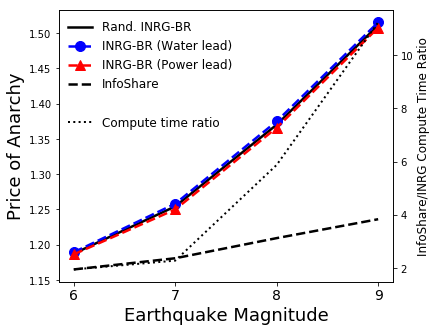

In [27]:
# Get computation time results
#Infoshare
times={'infoshare':[],'inrg':[]}
for m in [6,7,8,9]:
    info_t=[]
    inrg_t=[]
    for i in range(1,101):
        timefile=RESULTS_DIR+"infoshare_results_L2_forced_time_m"+`m`+"_v1/time_"+`i`+"_i0.out"
        with open(timefile) as f:
            time=float(f.readlines()[0])
            info_t.append(time)
        timefile=RESULTS_DIR+"inrg_results_L2_random_time_m"+`m`+"_v1/time_"+`i`+".out"
        with open(timefile) as f:
            time=float(f.readlines()[0])
            inrg_t.append(time)
    times['infoshare'].append(sum(info_t)/len(info_t))
    times['inrg'].append(sum(inrg_t)/len(inrg_t))
times['infoshare']=[avg_infoshare_iters[i]*times['infoshare'][i] for i in range(len(times['infoshare']))]
print times['infoshare']
print times['inrg']

print figsize
xs=[6,7,8,9]
inrg_random_poa=[x/y for x,y in zip(inrg_sums,tdindp_sums)]
inrg_13_poa    =[x/y for x,y in zip(inrg_13_sums,tdindp_sums)]
inrg_31_poa    =[x/y for x,y in zip(inrg_31_sums,tdindp_sums)]
infoshare_poa  =[x/y for x,y in zip(infoshare_sums,tdindp_sums)]
time_ratio     =[x/y for x,y in zip(times['infoshare'],times['inrg'])]
fig,ax1=plt.subplots(figsize=figsize,dpi=80)
ax1.plot(xs,inrg_random_poa,color='black',linestyle='-',linewidth=2.5,label="Rand. INRG-BR")
ax1.plot(xs,inrg_13_poa,color='blue',linestyle='--',linewidth=2.5,marker="o",markersize=10,label="INRG-BR (Water lead)")
ax1.plot(xs,inrg_31_poa,color='red',linestyle='--',linewidth=2.5,marker="^",markersize=10,label="INRG-BR (Power lead)")
ax1.plot(xs,infoshare_poa,color='black',linestyle='--',linewidth=2.5,label="InfoShare")
plt.xticks([6,7,8,9],fontsize=14)
ax1.set_xlabel("Earthquake Magnitude",fontsize=18)
ax1.set_ylabel("Price of Anarchy",fontsize=18)
ax1.legend(bbox_to_anchor=(0.55,1), frameon=False, fontsize=12)

ax2=ax1.twinx()
ax2.plot(xs,time_ratio,color='black',linestyle=":",linewidth=2,label="Compute time ratio")
ax2.set_ylabel("InfoShare/INRG Compute Time Ratio",fontsize=12)
ax2.legend(bbox_to_anchor=(0.5125,0.65), frameon=False, fontsize=12)
#ax2.legend(loc="upper left")
plt.savefig("figures/algorithm_total_comparison_poa.pdf",format='pdf',dpi=80,bbox_inches='tight')
plt.show()

In [10]:
# Number of computations:
for m in [6,7,8,9]:
    plt.figure(figsize=(8,6),dpi=80)
    p1_maxtime=max(bi_random_results[m][1]['results'].results)
    p3_maxtime=max(bi_random_results[m][3]['results'].results)
    print "Magnitude",m
    print "P3 maxtime=",p3_maxtime
    print "P1 maxtime=",p1_maxtime
    

Magnitude 6
P3 maxtime= 15
P1 maxtime= 15
Magnitude 7
P3 maxtime= 26
P1 maxtime= 26
Magnitude 8
P3 maxtime= 45
P1 maxtime= 45
Magnitude 9
P3 maxtime= 50
P1 maxtime= 50


In [12]:
a1=[1,2,3]
a2=[5,6,7]
a3=[x+y for x,y in zip(a1,a2)]
print a3

[6, 8, 10]


In [ ]:
* Cost comparison of algorithms (Magnitude 9)

In [ ]:
xs=[x for x in range(0,31)]
plt.figure(figsize=(6,5), dpi=80)
plt.plot(xs, [tdindp_results['results'].results[y]['costs']['Total'] for y in tdindp_results['results'].results], color="black", linewidth=2.5, linestyle="-",label="td-INDP")
#plt.plot(xs, [indp_results.results[y]['costs']['Total'] for y in tdindp_results.results], color="black", linewidth=2.5, linestyle="--",label="INDP")
plt.plot(xs, [infoshare_results[1][0]['results'].results[y]['costs']['Total'] for y in infoshare_results[1][0]['results'].results], color="blue",  linewidth=2.5, linestyle="-",label="InfoShare (Water),Iter. 1")
plt.plot(xs, [infoshare_results[1][1]['results'].results[y]['costs']['Total'] for y in infoshare_results[1][1]['results'].results], color="blue", linewidth=2.5, linestyle=":",label="InfoShare (Water),Iter. 2")
plt.plot(xs, [infoshare_results[3][0]['results'].results[y]['costs']['Total'] for y in infoshare_results[3][0]['results'].results], color="red",  linewidth=2.5, linestyle="-",label="InfoShare (Power),Iter. 1")
plt.plot(xs, [infoshare_results[3][1]['results'].results[y]['costs']['Total'] for y in infoshare_results[3][1]['results'].results], color="red", linewidth=2.5, linestyle=":",label="InfoShare (Power),Iter. 2")

plt.xticks([1,5,10,15,20,25,30],fontsize=10)
plt.xlim(1,30)
plt.xlabel("Iteration",fontsize=18)
plt.ylabel("Cost",fontsize=18)
plt.legend(bbox_to_anchor=(2.0, 1), frameon=False, fontsize=20)
plt.savefig("figures/tdINDP_vs_InfoShare_M8.png",dpi=160,bbox_inches='tight')
plt.show()

xs=[x for x in range(0,30)]
plt.figure(figsize=(6,5), dpi=80)
plt.plot(xs, [infoshare_results[1][1]['results'].results[y+1]['costs']['Total'] for y in infoshare_results[1][1]['results'].results if y <=29], color="blue", linewidth=2.5, linestyle=":",label="InfoShare (Water),Iter. 2")
plt.plot(xs, [infoshare_results[3][1]['results'].results[y+1]['costs']['Total'] for y in infoshare_results[3][1]['results'].results if y <=29], color="red", linewidth=2.5, linestyle=":",label="InfoShare (Power),Iter. 2")
plt.plot(xs, [inrg_results[1]['results'].results[y]['costs']['Total'] for y in inrg_results[1]['results'].results if y <=29], color="blue", linewidth=2.5, linestyle='-',label="INRG (Water)")
plt.plot(xs, [inrg_results[3]['results'].results[y]['costs']['Total'] for y in inrg_results[3]['results'].results if y <=29], color="red", linewidth=2.5, linestyle='-',label="INRG (Power)")

plt.xticks([1,5,10,15,20,25,30],fontsize=10)
plt.xlim(0,30)
plt.xlabel("Iteration",fontsize=18)
plt.ylabel("Cost",fontsize=18)
plt.legend(bbox_to_anchor=(2.0, 1), frameon=False, fontsize=20)
plt.savefig("figures/INRG_vs_InfoShare_M8.png",dpi=160,bbox_inches='tight')
plt.show()

#----------------------
# Over and Under supply
#----------------------
xs=[x for x in range(0,31)]
plt.figure(figsize=(6,5), dpi=80)
plt.plot(xs, [tdindp_results['results'].results[y]['costs']['Over Supply'] + tdindp_results['results'].results[y]['costs']['Under Supply'] for y in tdindp_results['results'].results], color="black", linewidth=2.5, linestyle="-",label="td-INDP")
#plt.plot(xs, [indp_results.results[y]['costs']['Total'] for y in tdindp_results.results], color="black", linewidth=2.5, linestyle="--",label="INDP")
plt.plot(xs, [infoshare_results[1][0]['results'].results[y]['costs']['Over Supply'] + infoshare_results[1][0]['results'].results[y]['costs']['Under Supply'] for y in infoshare_results[1][0]['results'].results], color="blue",  linewidth=2.5, linestyle="-",label="InfoShare (Water),Iter. 1")
plt.plot(xs, [infoshare_results[1][1]['results'].results[y]['costs']['Over Supply'] + infoshare_results[1][1]['results'].results[y]['costs']['Under Supply'] for y in infoshare_results[1][1]['results'].results], color="blue", linewidth=2.5, linestyle=":",label="InfoShare (Water),Iter. 2")
plt.plot(xs, [infoshare_results[3][0]['results'].results[y]['costs']['Over Supply'] + infoshare_results[3][0]['results'].results[y]['costs']['Under Supply'] for y in infoshare_results[3][0]['results'].results], color="red",  linewidth=2.5, linestyle="-",label="InfoShare (Power),Iter. 1")
plt.plot(xs, [infoshare_results[3][1]['results'].results[y]['costs']['Over Supply'] + infoshare_results[3][1]['results'].results[y]['costs']['Under Supply'] for y in infoshare_results[3][1]['results'].results], color="red", linewidth=2.5, linestyle=":",label="InfoShare (Power),Iter. 2")

plt.xticks([1,5,10,15,20,25,30],fontsize=10)
plt.xlim(1,30)
plt.xlabel("Iteration",fontsize=18)
plt.ylabel("Cost",fontsize=18)
plt.legend(bbox_to_anchor=(2.0, 1), frameon=False, fontsize=20)
plt.savefig("figures/tdINDP_vs_InfoShare_M8_supplypenalty.png",dpi=160,bbox_inches='tight')
plt.show()

xs=[x for x in range(0,30)]
plt.figure(figsize=(6,5), dpi=80)
plt.plot(xs, [infoshare_results[1][1]['results'].results[y+1]['costs']['Over Supply'] + infoshare_results[1][1]['results'].results[y+1]['costs']['Under Supply'] for y in infoshare_results[1][1]['results'].results if y <=29], color="blue", linewidth=2.5, linestyle=":",label="InfoShare (Water),Iter. 2")
plt.plot(xs, [infoshare_results[3][1]['results'].results[y+1]['costs']['Over Supply'] + infoshare_results[3][1]['results'].results[y+1]['costs']['Under Supply']for y in infoshare_results[3][1]['results'].results if y <=29], color="red", linewidth=2.5, linestyle=":",label="InfoShare (Power),Iter. 2")
plt.plot(xs, [inrg_results[1]['results'].results[y]['costs']['Over Supply'] + inrg_results[1]['results'].results[y]['costs']['Under Supply'] for y in inrg_results[1]['results'].results if y <=29], color="blue", linewidth=2.5, linestyle='-',label="INRG (Water)")
plt.plot(xs, [inrg_results[3]['results'].results[y]['costs']['Over Supply'] + inrg_results[3]['results'].results[y]['costs']['Under Supply'] for y in inrg_results[3]['results'].results if y <=29], color="red", linewidth=2.5, linestyle='-',label="INRG (Power)")

plt.xticks([1,5,10,15,20,25,30],fontsize=10)
plt.xlim(0,30)
plt.xlabel("Iteration",fontsize=18)
plt.ylabel("Cost",fontsize=18)
plt.legend(bbox_to_anchor=(2.0, 1), frameon=False, fontsize=20)
plt.savefig("figures/INRG_vs_InfoShare_M8_supplypenalty.png",dpi=160,bbox_inches='tight')
plt.show()




In [ ]:

pylab.rcParams['figure.figsize'] = (12,6)
#INDP Validation Plot: 
xs=[x for x in range(1,31)]
plt.figure(figsize=(6,5), dpi=80)
plt.plot(xs, results_dict['indp']['m6']['v3']['total_costs_norm'][:30], color="black", linewidth=2.5, linestyle="-",label="M6")
plt.plot(xs, results_dict['indp']['m8']['v3']['total_costs_norm'][:30], color="black",  linewidth=2.5, linestyle="--",label="M8")
plt.plot(xs, results_dict['indp']['m9']['v3']['total_costs_norm'][:30], color="black", linewidth=2.5, linestyle=":",label="M9")
plt.xticks([1,5,10,15,20,25,30],fontsize=10)
plt.xlim(1,30)
plt.xlabel("Iteration",fontsize=18)
plt.ylabel("Cost",fontsize=18)
plt.legend(bbox_to_anchor=(1.5, 1), frameon=False, fontsize=20)
plt.savefig("figures/INDP_V3_total_costs.png",dpi=160,bbox_inches='tight')
plt.show()
#INDP Plot. Reconstruction costs.
xs=[x for x in range(1,31)]
plt.figure(figsize=(6,5), dpi=80)
plt.plot(xs, results_dict['indp']['m6']['v3']['reconstruction_costs_norm'][:30], color="black", linewidth=2.5, linestyle="-",label="M6")
plt.plot(xs, results_dict['indp']['m8']['v3']['reconstruction_costs_norm'][:30], color="black",  linewidth=2.5, linestyle="--",label="M8")
plt.plot(xs, results_dict['indp']['m9']['v3']['reconstruction_costs_norm'][:30], color="black", linewidth=2.5, linestyle=":",label="M9")
plt.xticks([1,5,10,15,20,25,30],fontsize=10)
plt.xlim(1,30)
plt.xlabel("Iteration",fontsize=18)
plt.ylabel("Cost",fontsize=18)
plt.legend(bbox_to_anchor=(1.5, 1), frameon=False, fontsize=20)
plt.savefig("figures/INDP_V3_reconstruction_costs.png",dpi=160,bbox_inches='tight')
plt.show()

In [ ]:
cd= 26888440294.0
cnd=4440294.0
cf= 499766.0
xs=[x for x in range(1,31)]
limit=10
m='m6'
costs='total_costs'
norm=cd
if costs=='reconstruction_costs':
    norm=cnd
plt.figure(figsize=(6,5), dpi=80)
p1=  [x/norm for x in results_dict['inrg'][m]['v1'][1][costs][:30]]
p3=  [x/norm for x in results_dict['inrg'][m]['v1'][3][costs][:30]]
indp=[x/norm for x in results_dict['indp'][m]['v2'][costs][:30]]
total=[x+y for x,y in zip(p1,p3)]

#Plot.
plt.figure(figsize=(6,5), dpi=80)
plt.plot(xs[:limit], p1[:limit], color="blue", linewidth=2.5, linestyle="-",label="Water")
plt.plot(xs[:limit], p3[:limit], color="red",  linewidth=2.5, linestyle="-",label="Power")
plt.plot(xs[:limit], total[:limit],color="black",linewidth=2.5, linestyle="-",label="Sum")
plt.plot(xs[:limit], indp[:limit], color="black", linewidth=2.5, linestyle="--",label="INDP")
plt.xticks([1,5,10,15,20,25,30],fontsize=10)
plt.xlim(1,limit)
plt.xlabel("Iteration",fontsize=18)
plt.ylabel("Cost",fontsize=18)
plt.legend(bbox_to_anchor=(1.5, 1), frameon=False, fontsize=20)
plt.savefig("figures/INDP_vs_INRG_V2_"+m+"_"+costs+".png",dpi=160,bbox_inches='tight')
plt.show()

# Plot sums.
p1_ax=[]
p3_ax=[]
sum_ax=[]
indp_ax=[]
for mx in ['m6','m8','m9']:
    p1_curr=sum([x/norm for x in results_dict['inrg'][mx]['v1'][1]['total_costs'][:30]])
    p3_curr=sum([x/norm for x in results_dict['inrg'][mx]['v1'][3]['total_costs'][:30]])
    p1_ax.append(p1_curr)
    p3_ax.append(p3_curr)
    sum_ax.append(p1_curr+p3_curr)
    indp_ax.append(sum([x/norm for x in results_dict['indp'][mx]['v2']['total_costs'][:30]]))
print "M6 ratio=",sum_ax[0]/indp_ax[0]
print "M8 ratio=",sum_ax[1]/indp_ax[1]
print "M9 ratio=",sum_ax[2]/indp_ax[2]
xs=[6,8,9]
plt.figure(figsize=(6,5), dpi=80)
plt.plot(xs,p1_ax,color="blue",linewidth=2.5, linestyle="-",label="Water")
plt.plot(xs, p3_ax, color="red",  linewidth=2.5, linestyle="-",label="Power")
plt.plot(xs, sum_ax,color="black",linewidth=2.5, linestyle="-",label="Sum")
plt.plot(xs, indp_ax, color="black", linewidth=2.5, linestyle="--",label="INDP")
plt.xlim(6,9)
plt.xticks([6,8,9],fontsize=10)
plt.xlabel("Earthquake magnitude",fontsize=18)
plt.ylabel("Cost",fontsize=18)
plt.legend(bbox_to_anchor=(1.5, 1), frameon=False, fontsize=20)
plt.savefig("figures/INDP_vs_INRG_V2.png",dpi=160,bbox_inches='tight')
plt.show()

In [ ]:
# Percolation results: M9
perc_dir="indp_percolation_results_m9_v2"
t=25
num_samples=1000
num_clusters=[0.0]*(t+1)
gc_size=[0.0]*(t+1)
xs=[x for x in range(0,t+1)]
for i in range(1,num_samples+1):
    perc_file=perc_dir+"/clusters_"+`i`+".out"
    with open(perc_file) as f:
        lines=f.readlines()[1:]
        for curr_t in range(t+1):
            line=string.split(lines[curr_t],",")
            num_c=int(line[1])
            gc_s=int(line[2])
            num_clusters[curr_t]+=num_c
            gc_size[curr_t]+=gc_s
gc_size=[x/num_samples for x in gc_size]
num_clusters=[x/num_samples for x in num_clusters]

plt.figure(figsize=(6,5), dpi=80)
plt.plot(xs,gc_size,linewidth=4)
plt.xlabel("Recovery timesteps",fontsize=18)
plt.ylabel("Size of GC",fontsize=18)
plt.savefig("figures/INDP_M9_V2_GCSize.png",dpi=160,bbox_inches='tight')

plt.figure(figsize=(6,5), dpi=80)
plt.plot(xs,num_clusters,linewidth=4)
plt.xlabel("Recovery timesteps",fontsize=18)
plt.ylabel("# of components",fontsize=18)
plt.savefig("figures/INDP_M9_V2_numcomponents.png",dpi=160,bbox_inches='tight')

In [ ]:
from operator import itemgetter
sample_num=1
time=25
xs=[x for x in range(time+1)]
components=[]
component_ids={}
component_id_idx=1
with open(perc_dir+"/clusters_"+`sample_num`+".out") as f:
    lines=f.readlines()[1:]
    for line in lines:
        components_t={}
        data=string.split(line,",")
        gc_size=int(data[2])
        component_strings=data[3:]
        for component_string in component_strings:
            node_strings=string.split(component_string,"/")
            excess_supply=float(string.split(node_strings[-1],":")[1])
            component=[]
            for node_string in node_strings:
                node_split=string.split(node_string,";")
                node=(int(string.split(node_split[0],".")[0]),int(string.split(node_split[0],".")[1]))
                component.append(node)
            component=tuple(sorted(component,key=itemgetter(0)))
            if component not in component_ids:
                component_ids[component]=component_id_idx
                component_id_idx+=1
            components_t[component]=excess_supply
        components.append(components_t)
xs=[]
ys=[]
sizes=[]
colors=[]
txt=[]
for t in range(len(components)):
    component_dict=components[t]
    for component_key in component_dict:
        xs.append(t)
        ys.append(component_dict[component_key])
        sizes.append(len(component_key)*10)
        if component_dict[component_key] > 0.0:
            colors.append('blue')
        else:
            colors.append('red')
        txt.append(component_ids[component_key])

fig,ax=plt.subplots(figsize=(14,12), dpi=80)
ax.scatter(xs,ys,s=sizes,c=colors)
ax.set_xlabel("Recovery timesteps",fontsize=18)
ax.set_ylabel("Component excess supply",fontsize=18)
ax.set_xlim((-3,28))
for i,lbl in enumerate(txt):
    ax.annotate(lbl, (xs[i],ys[i]), fontsize=14)
fig.tight_layout()
plt.savefig("figures/INDP_M9_V2_ComponentExcess.png",dpi=160,bbox_inches='tight')   

In [ ]:
# iINDP results.
import string
iindp_dir="tdindp_tdindp_results_dt5_m8_v2"
all_costs=[0.0]*32
all_costs_nd=[0.0]*32
all_costs_flow=[0.0]*32
for i in range(1,1001):
    with open(iindp_dir+"/utilities_"+`i`+".out") as f:
        data=string.split(f.readlines()[1])
        actions=string.split(data[0],"-")
        costs=[float(x) for x in string.split(data[1],"-")]
        costs_nd=[float(x) for x in string.split(data[2],"-")]
        costs_flow=[float(x) for x in string.split(data[3],"-")]
        actions_no=[actions[0]]
        all_costs[0]=all_costs[0]+costs[0]
        all_costs_nd[0]=all_costs_nd[0]+costs_nd[0]
        all_costs_flow[0]=all_costs_flow[0]+costs_flow[0]
        k=0
        for j in range(1,len(actions)):
            if actions[j] != "[]":
                k=k+1
                actions_no.append(actions[j])
                all_costs[k]=all_costs[k]+(costs[j]-all_costs_flow[j])
                all_costs_nd[k]=all_costs_nd[k]+costs_nd[j]
                all_costs_flow[k]=all_costs_flow[k]+costs_flow[j]
all_costs=[x/1000.0/costs_disconn for x in all_costs]
all_costs_nd=[x/1000.0 for x in all_costs_nd]
all_costs_flow=[x/1000.0 for x in all_costs_flow]
xs=[x for x in range(30)]
pylab.rcParams['figure.figsize'] = (12,6)
#INDP Validation Plot: 
plt.figure(figsize=(6,5), dpi=80)
print all_costs[2],results_dict['indp']['m8']['v2']['total_costs'][0]
plt.plot(xs, results_dict['indp']['m8']['v2']['total_costs_norm'][:30], color="black",  linewidth=2.5, linestyle="--",label="INDP M8")
plt.plot(xs, all_costs[2:], color="black", linewidth=2.5, linestyle="-",label="iINDP M8")
plt.xticks([1,5,10,15,20,25,30],fontsize=10)
plt.xlim(0,30)
plt.xlabel("Iteration",fontsize=18)
plt.ylabel("Cost",fontsize=18)
plt.legend(bbox_to_anchor=(1.5, 1), frameon=False, fontsize=20)
plt.savefig("figures/iINDP_V2_dt5_total_costs.png",dpi=160,bbox_inches='tight')
plt.show()
